# PROBLEM STATEMENT




- Data set:
  - Input (X): Outside Air Temperature
  - Output (Y): Overall daily revenue generated in dollars



# STEP #0: IMPORT LIBRARIES

In [ ]:
!pip install tensorflow-gpu==2.0.0.alpha0
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0.alpha0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0.alpha0


# STEP #1: IMPORT DATASET

In [ ]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sales_df = pd.read_csv('/content/drive/My Drive/Regression/SalesData.csv')

In [ ]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [ ]:
sales_df.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
sales_df.tail(10)

In [ ]:
sales_df.info()

In [ ]:
sales_df.describe()

# STEP #2: VISUALIZE DATASET

In [ ]:
sns.scatterplot(sales_df['Temperature'], sales_df['Revenue'])

# STEP #3: CREATE TESTING AND TRAINING DATASET

In [ ]:
X_train = sales_df['Temperature']
y_train = sales_df['Revenue']

# STEP#4: BUILD AND TRAIN THE MODEL

In [ ]:
X_train.shape

(500,)

In [ ]:
y_train.shape

(500,)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000
16/16 [==============================] - 2s 3ms/step - loss: 292123.3125
Epoch 2/1000
16/16 [==============================] - 0s 3ms/step - loss: 251364.7031
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 215350.0312
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 182393.4844
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 154279.4219
Epoch 6/1000
16/16 [==============================] - 0s 3ms/step - loss: 129269.5234
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 107532.2344
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 88895.4141
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 73240.5469
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 59514.8984
Epoch 11/1000
16/16 [==============================] - 0s 2ms/step - loss: 48293.7578
Epoch 12/1000
16/16 [==============================] - 0

# STEP#5: EVALUATE THE MODEL

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss'])

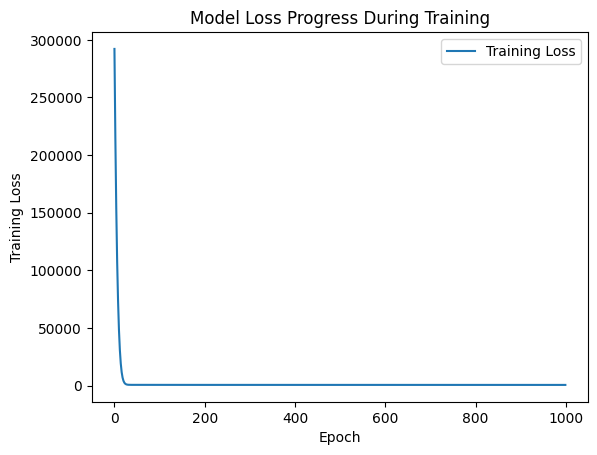

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [ ]:
model.get_weights()

[array([[21.405394]], dtype=float32), array([44.82441], dtype=float32)]

In [ ]:
# Use the trained model to perform predictions


Temp = 0
Revenue = model.predict([Temp])
print('Revenue Predictions Using Trained ANN =', Revenue)


1/1 [==============================] - 0s 76ms/step
Revenue Predictions Using Trained ANN = [[44.82441]]


16/16 [==============================] - 0s 5ms/step


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand')

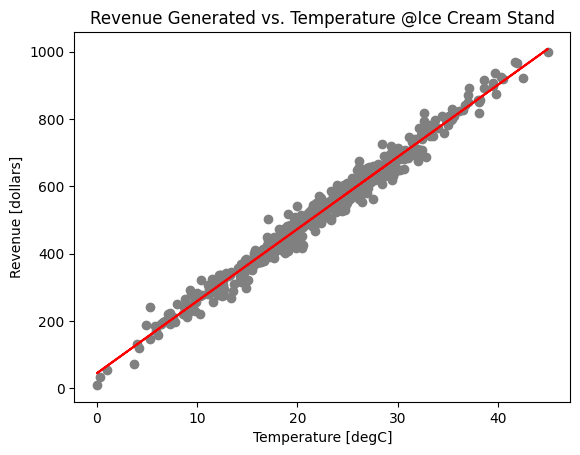

In [ ]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')

# STEP #6 (OPTIONAL): CONFIRM USING REGRESSION KIT IN SCIKIT LEARN!

In [ ]:
X_train = X_train.values.reshape(-1,1)

In [ ]:
X_train.shape

In [ ]:
y_train = y_train.values.reshape(-1,1)

In [ ]:
y_train.shape

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept = False)
regressor.fit(X_train, y_train)

In [ ]:
print('Linear Model Coeff(m)', regressor.coef_)
print('Linear Model Coeff(b)', regressor.intercept_)

In [ ]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')